# Programming for Data Analysis Assignment 2

Author - Sean Humphreys

## Contents

1. [Problem Statement](#problem-statement)

1. [Software Libraries](#software-libraries)

1. [Data Cleansing](#data-cleansing)

    1. [Carbon Dioxide Data](#co2-data)

        1. [Mauna Loa co2 Data](#mauna-loa-co2-data)

        2. [IPCC c02 Data](#ipcc-co2-data)

        2. [Luthi et al. co2 Data](#luthi-et-al-co2-data)

    2. [Temperature Data](#temperature-data)

        1. [Jouzel (2007) Temperature Data](#jouzel-2007-temperature-data)

    3. [Methane Data](#methane-data)


2. [Analysis](#analysis)

    1.[Carbon Dioxide](#carbon-dioxide)

2. [References](#references)

3. [Associated Reading](#associated-reading)

---

## Problem Statement <a id="problem-statement"></a>

+ Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

+ Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

+ Examine Irish context:
    
    + [Climate change signals](/literature/the_emergence_of_a_climate_change_signal_in_long_term_irish_meteorological_observations.pdf) : (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

+ Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

+ For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

+ Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

+ Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage)

---

## Software Libraries <a id="software-libraries"></a>

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 13 Dec. 2023) - is an open-source software library for creating static, animated, and interactive visualisations in Python.

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the Python programming language. A Pandas DataFrame is a dictionary like container for series objects. A DataFrame is the primary Pandas data structure.

In [60]:
# import the required software libraries
import pandas as pd
import matplotlib.pyplot as plt

---

## Data Cleansing <a id="data-cleansing"></a>

The Pandas software library is used to clean and process datasets. 

### Carbon Dioxide Data <a id="carbon-dioxide-data"></a>

####  Mauna Loa co2 Data <a id="mauna-loa-c02-data"></a>

The most recent CO2 dataset in a Comma Separated Value (CSV) file is available from from https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv. This dataset contains measurements of annual mean CO2 expressed as a mole fraction in dry air. The range of years in the dataset is from 1959 to 2022.

Using Pandas the CSV) file can be read in as a DataFrame.

In [61]:
# https://gml.noaa.gov/ccgg/trends/data.html
mauna_loa = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv', skiprows=43)

The columns in the dataset are renamed to logical names.

In [62]:
# code adapted from # https://sparkbyexamples.com/pandas/rename-columns-with-list-in-pandas-dataframe/
cols = ['year', 'co2_ppmv', 'unc']

mauna_loa.columns = cols

An unnecessary column is removed from the dataset.

In [63]:
# code adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html [Accessed 13 Dec. 2023]
mauna_loa.drop(['unc'], axis=1, inplace=True)

An additional column is added to the dataset that calculates the year no before the 2023.

In [64]:
mauna_loa['years_before_present'] = 2023 - mauna_loa['year']

# sort the data based on the year before present. Based on code from - https://saturncloud.io/blog/how-to-sort-pandas-dataframe-from-one-column/ [Accessed 13 Dec. 2023].
mauna_loa = mauna_loa.sort_values('years_before_present')

The columns in the dataset are reordered.

In [65]:
# adapted from code found here - https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns [Accessed 13 Dec. 2023]
mauna_loa = mauna_loa.reindex(columns=['yr_bp', 'co2_ppmv', 'year', 'years_before_present'])

####  IPCC co2 Data <a id="ipcc-c02-data"></a>

The second carbon dioxide dataset is sourced from the [The Intergovernmental Panel on Climate Change (IPCC)](https://www.ipcc.ch/) (https://www.ipcc.ch/). This dataset is a composite of a number of samples of carbon dioxide data from studies on ice core analysis. The samples have been data using the The Antarctic Ice Core Chronology (AICC2012) system. This is discussed further [here](#data-analysis).

This dataset contains measurements of CO2. The range of years in the composite dataset is from 1950 to 803,182 years from 2023.

The excel spreadsheet with historic IPCC co2 data is read in as a Pandas Dataframe.

In [104]:
master_data = pd.read_excel('datasets/historic/co2/grl52461-sup-0003-supplementary.xls', sheet_name='all records')

DataFrames to capture specific subsets of data from assorted studies in the master dataset are defined. These subsets will be stitched together to create a composite dataset of historic co2 data.

In [105]:
# use iloc to create subsets of data from the master dataset
rubino = master_data.iloc[90:, [83, 86]]
macfarling = master_data.iloc[137:, 68:70]
monnin = master_data.iloc[25:120, 2:4]
marcott = master_data.iloc[31:321, 98:100]
ahn = master_data.iloc[7:202, 89:91]
bereiter = master_data.iloc[28:106, 34:36]
bereiter_2 = master_data.iloc[60:154, 39:41]
schneider = master_data.iloc[6:, 65:67]
petit = master_data.iloc[124:348, 7:9]
siegenthaler = master_data.iloc[6:26, 20:22]
siegenthaler_2 = master_data.iloc[6:226, 15:17]
bereiter_3 = master_data.iloc[37:, 102:104]

The columns in each dataframe are renamed to logical names

In [106]:
rubino.rename(columns=({'Unnamed: 83':'yr_bp', 'Unnamed: 86':'co2_ppmv'}), inplace=True)
macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'yr_bp', 'Unnamed: 69':'co2_ppmv'}), inplace=True)
monnin.rename(columns=({'Unnamed: 2':'yr_bp', 'Unnamed: 3':'co2_ppmv'}), inplace=True)
marcott.rename(columns=({'Unnamed: 98':'yr_bp', 'Unnamed: 99':'co2_ppmv'}), inplace=True)
ahn.rename(columns=({'Unnamed: 89':'yr_bp', 'Unnamed: 90':'co2_ppmv'}), inplace=True)
bereiter.rename(columns=({'Unnamed: 34':'yr_bp', 'Unnamed: 35':'co2_ppmv'}), inplace=True)
bereiter_2.rename(columns=({'Unnamed: 39':'yr_bp', 'Unnamed: 40':'co2_ppmv'}), inplace=True)
schneider.rename(columns=({'Unnamed: 65':'yr_bp', 'Unnamed: 66':'co2_ppmv'}), inplace=True)
petit.rename(columns=({'Unnamed: 7':'yr_bp', 'Unnamed: 8':'co2_ppmv'}), inplace=True)
siegenthaler.rename(columns=({'Unnamed: 20':'yr_bp', 'Unnamed: 21':'co2_ppmv'}), inplace=True)
siegenthaler_2.rename(columns=({'Unnamed: 15':'yr_bp', 'Unnamed: 16':'co2_ppmv'}), inplace=True)
bereiter_3.rename(columns=({'Unnamed: 102':'yr_bp', 'Unnamed: 103':'co2_ppmv'}), inplace=True)


A function is defined to carry out a number of processing actions on each DataFrame. The `year()` function:

+ creates a columns that calculates the year based on the before present value

+ creates a column that calculates the year before present values

+ drops any rows with null values

In [107]:
def year(sample):
    sample['year'] = 1950-(sample['yr_bp'])
    sample['years_before_present'] = 2023 - sample['year']
    sample.dropna(axis=0, inplace=True)
    return sample

Using a for loop, each of the subsets of data can be passed to the `year()` function.

In [108]:
studies = [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]

for study in studies:
    year(study)

Each of the subsets of co2 data is concatenated into one DataFrame to create a composite.

In [109]:
# code adapted from https://pandas.pydata.org/docs/reference/api/pandas.concat.html [Accessed 13 Dec. 2023].
frames = [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]

ipcc_full_co2_data = pd.concat(frames, ignore_index = True)

Inspecting the first 5 rows of the DataFrame gives a visual insight into the variables in the DataFrame.

Using the `info ()` gives an indication of the datatypes in the concatenated DataFrame. All variables are *objects*. This limits they type of analysis that can be carried out on these variables.

In [110]:
ipcc_full_co2_data.head()

,yr_bp,co2_ppmv,year,years_before_present
0,-8.562971,316.33402,1958.562971,64.437029
1,-8.102786,316.101403,1958.102786,64.897214
2,-7.872424,314.572166,1957.872424,65.127576
3,-7.257539,315.270355,1957.257539,65.742461
4,-7.203374,316.32538,1957.203374,65.796626


In [111]:
ipcc_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   yr_bp                 1852 non-null   object
 1   co2_ppmv              1852 non-null   object
 2   year                  1852 non-null   object
 3   years_before_present  1852 non-null   object
dtypes: object(4)
memory usage: 58.0+ KB


The Pandas `astype()` function can be used to cast a Pandas object toa specific type of datatype. The *yr_bp* variable is a measure of the year and as such can be a floating p point integer e.g. -8.56291 years before present represents 8 whole years and .56291 of a whole year. The same can be said of the *years_before_present* variable. The *year* variable is an integer value assigned as the name of the year. In this context it can be left as an object as it is more of a label than a value that will be used for analysis.

In [114]:
# code adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-astype/ [Accessed 15 Dec. 2023].
ipcc_full_co2_data = ipcc_full_co2_data.astype({'yr_bp':'float64', 'co2_ppmv':'float64', 'years_before_present':'float64'})

In [115]:
ipcc_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr_bp                 1852 non-null   float64
 1   co2_ppmv              1852 non-null   float64
 2   year                  1852 non-null   int64  
 3   years_before_present  1852 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 58.0 KB


In [116]:
ipcc_full_co2_data.head()

,yr_bp,co2_ppmv,year,years_before_present
0,-8.562971,316.334020,1958,64.437029
1,-8.102786,316.101403,1958,64.897214
2,-7.872424,314.572166,1957,65.127576
3,-7.257539,315.270355,1957,65.742461
4,-7.203374,316.325380,1957,65.796626


####  Luthi et al. co2 Data <a id="Luthi-c02-data"></a>

Historic co2 data to 800k years before present is read in as a Pandas DataFrames.

In [76]:
co2_ipcc = pd.read_excel('/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='2.  Vostok-TD-Dome C')
co2_ipcc_new = pd.read_excel('/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='1.  new CO2 data')

DataFrames to capture specific subsets of data from assorted studies in the master dataset are defined. These subsets will be stitched together to create a composite dataset of historic co2 data.

In [77]:
monnin_luthi = co2_ipcc.iloc[6:189, 1:3]
pettit_luthi = co2_ipcc.iloc[19:353, 5:7]
siegenthaler_1_luthi = co2_ipcc.iloc[6:26, 16:18]
siegenthaler_2_luthi = co2_ipcc.iloc[6:328, 12:14]
luthi_luthi = co2_ipcc_new.iloc[16:253, 1:3]

The columns in each dataframe are renamed to logical names.

In [78]:
monnin_luthi.rename(columns=({'Unnamed: 1':'yr_bp', 'Unnamed: 2':'co2_ppmv'}), inplace=True)
pettit_luthi.rename(columns=({'Unnamed: 5':'yr_bp', 'Unnamed: 6':'co2_ppmv'}), inplace=True)
siegenthaler_1_luthi.rename(columns=({'Unnamed: 16':'yr_bp', 'Unnamed: 17':'co2_ppmv'}), inplace=True)
siegenthaler_2_luthi.rename(columns=({'Unnamed: 12':'yr_bp', 'Unnamed: 13':'co2_ppmv'}), inplace=True)
luthi_luthi.rename(columns=({'Unnamed: 1':'yr_bp', 'Unnamed: 2':'co2_ppmv'}), inplace=True)

Using a for loop, each of the subsets of data can be passed to the `year()` function.

In [79]:
studies = [monnin_luthi ,pettit_luthi, siegenthaler_1_luthi, siegenthaler_2_luthi, luthi_luthi]

for study in studies:
    year(study)

Each of the subsets of co2 data is concatenated into one DataFrame to create a composite of the data in Luthi et al (2008).

In [80]:
luthi_frames = [monnin_luthi ,pettit_luthi, siegenthaler_1_luthi, siegenthaler_2_luthi, luthi_luthi]

luthi_full_co2_data = pd.concat(luthi_frames, ignore_index = True)

The concatenated dataset is explored.

In [117]:
luthi_full_co2_data.head()

,yr_bp,co2_ppmv,year,years_before_present
0,137,280.4,1813,210
1,268,274.9,1682,341
2,279,277.9,1671,352
3,395,279.1,1555,468
4,404,281.9,1546,477


In [118]:
luthi_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   yr_bp                 1096 non-null   object
 1   co2_ppmv              1096 non-null   object
 2   year                  1096 non-null   object
 3   years_before_present  1096 non-null   object
dtypes: object(4)
memory usage: 34.4+ KB


The variables are cast to match the variables in the IPCC co2 comosite dataframe.

In [119]:
luthi_full_co2_data = luthi_full_co2_data.astype({'yr_bp':'float64', 'co2_ppmv':'float64', 'years_before_present':'float64'})

In [121]:
luthi_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr_bp                 1096 non-null   float64
 1   co2_ppmv              1096 non-null   float64
 2   year                  1096 non-null   object 
 3   years_before_present  1096 non-null   float64
dtypes: float64(3), object(1)
memory usage: 34.4+ KB


In [122]:
luthi_full_co2_data.head(5)

,yr_bp,co2_ppmv,year,years_before_present
0,137.0,280.4,1813,210.0
1,268.0,274.9,1682,341.0
2,279.0,277.9,1671,352.0
3,395.0,279.1,1555,468.0
4,404.0,281.9,1546,477.0


### Temperature Data <a id="temperature-data"></a>

#### Jouzel (2007) Temperature Data <a id="jouzel-(2007)-temperature-data"></a>



Temperature data from Jouzel is read in as a Pandas DataFrame.

In [82]:
# https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac

jouzel_temp = pd.read_csv('https://doi.pangaea.de/10.1594/PANGAEA.683655?format=textfile', sep="\t", skiprows=20)

The columns are renamed to logical names.

In [83]:
jouzel_temp.rename(columns=({"Depth ice/snow [m]":"depth_ice_snow_m", "Age model [ka]":"age_model_ka", "δD [‰ SMOW]":"δd_‰_smow", "delta T [°C]":"delta_t_c", "Sample ID":"sample_id"}), inplace=True)

Columns are added to calculate the year and the year before 2023.

In [84]:
jouzel_temp['year'] = 1950-(jouzel_temp['age_model_ka']*1000)
jouzel_temp['years_before_present'] = 2023 - jouzel_temp['year']

In [85]:
jouzel_temp

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id,year,years_before_present
0,0.00,-0.050,NaN,NaN,1,2000.0,23.0
1,0.55,-0.044,NaN,NaN,2,1994.0,29.0
2,1.10,-0.037,NaN,NaN,3,1987.0,36.0
3,1.65,-0.032,NaN,NaN,4,1982.0,41.0
4,2.20,-0.025,NaN,NaN,5,1975.0,48.0
...,...,...,...,...,...,...,...
5795,3187.25,797.408,-440.2,-8.73,5796,-795458.0,797481.0
5796,3187.80,798.443,-439.0,-8.54,5797,-796493.0,798516.0
5797,3188.35,799.501,-441.1,-8.88,5798,-797551.0,799574.0
5798,3188.90,800.589,-441.4,-8.92,5799,-798639.0,800662.0


3rd set of temp dtat

The temperature from from 1880 to 2022 in this dataset is sourced from [NASA](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt) (https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt [Accessed 12 Dec. 2023].). [2]

Temperature data from 1880 to 800k years from the 2023 was sourced from [https://www.temperaturerecord.org/#sources](https://www.temperaturerecord.org/#sources) accessed 13 Dec. 2023. [3] & [4]

All of the temperature data is compared to the long-term average from 1951 to 1980.

[2] Credits - Snyder, C.W. 2016.

[3] Credits - Marcott et al, 2013

[4] Credits - Shakun et al, 2012



Using Pandas modern temperature data is read in from the NASA website.

In [86]:
nasa_temp = pd.read_csv('https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt', 
                       skiprows=5, header=None, sep = ' ', skipinitialspace=True, engine='python', names=['year', 'temp_anomaly', 'lowness'])

An unnecessary column is dropped from the DataFrame.

In [87]:
nasa_temp.drop(['lowness'], axis=1, inplace=True)

A column with the year before present is created.

In [88]:
nasa_temp['yr_bp'] = 1950 - nasa_temp['year']

The remaining columns are renamed to a standard naming convention that will be used with temperature data from another source.

In [89]:
nasa_temp = nasa_temp.reindex(columns=['year', 'yr_bp', 'temp_anomaly'])

The NASA data is sorted by year.

In [90]:
nasa_temp = nasa_temp.sort_values('year', ascending=False)

Pre 1800's temperature data is read in from worksheets in an excel spreadsheet that contains all of the historic temperature data.

In [91]:
moberg_temp = pd.read_excel('datasets/historic/temperature/temperature_dataset.xlsx', 
                            sheet_name='2,000 yr',  names=['year', 'yr_bp', 'temp_anomaly', 'x', 'y', 'z'])
clark_temp = pd.read_excel('datasets/historic/temperature/temperature_dataset.xlsx', 
                           sheet_name='20,000 yr', names=['yr_bp', 'temp_anomaly', 'x', 'y', 'z'])
shakun_temp = pd.read_excel('datasets/historic/temperature/temperature_dataset.xlsx', 
                            sheet_name='800,000 yr', names=['yr_bp', 'temp_anomaly', 'x', 'y', 'z'])


Unneeded columns are removed from the DataFrames.

In [92]:
moberg_temp.drop(['x', 'y', 'z'],axis=1, inplace=True)

The remaining columns are re-ordered to make them consistent with the rest of the temperature DataFrames.

In [93]:
moberg_temp.drop(moberg_temp.index[0:100], axis = 0, inplace = True)

A number of precessing tasks are grouped together in a function. The `temp_year()` function removes unneeded columns from the DataFrame and adds a column to calculate the year.

In [94]:
def temp_year(sample):
    sample.drop(['x', 'y', 'z'],axis=1, inplace=True)
    sample['year'] = 1950 - sample['yr_bp']
    return sample

Using a for loop the relevant datasets are paased to the `temp_year()` function.

In [95]:
samples = [clark_temp, shakun_temp]

for sample in samples:
    temp_year(sample)

The columns in the DataFrames are re-ordered to be consistent with the other temperature DataFrames.

In [96]:
clark_temp = clark_temp.reindex(columns=['year', 'yr_bp', 'temp_anomaly'])
shakun_temp = shakun_temp.reindex(columns=['year', 'yr_bp', 'temp_anomaly'])

Rows are dropped from each of the  DataFrames so that there is no overlap between them.

In [97]:
clark_temp.drop(clark_temp.index[0:19], axis = 0, inplace = True)
shakun_temp.drop(shakun_temp.index[0:7], axis = 0, inplace = True)

All of the temperature DataFrames are concatenated to give a composite record of the temperature anomaly over the last 800k years.

In [98]:
frames_temp = [nasa_temp, moberg_temp, clark_temp, shakun_temp]

full_temp_data = pd.concat(frames_temp, ignore_index = True)

In [99]:
full_temp_data

,year,yr_bp,temp_anomaly
0,2022,-72,0.890000
1,2021,-71,0.850000
2,2020,-70,1.020000
3,2019,-69,0.980000
4,2018,-68,0.850000
...,...,...,...
2478,-784050,786000,-0.563657
2479,-787050,789000,-0.991467
2480,-790050,792000,-1.155061
2481,-793050,795000,-2.457660


### Methane Data <a id="methane-data"></a>

## Analysis <a id="data-cleansing"></a>

### Carbon Dioxide <a id="data-cleansing"></a>



Exploring the cleansed datasets 

In [100]:
ipcc_full_co2_data.describe()

,yr_bp,co2_ppmv,year,years_before_present
count,1852.000000,1852.000000,1852.000000,1852.000000
mean,249318.545537,233.674711,-247368.153348,249391.545537
std,275026.267962,32.483980,275026.156900,275026.267962
min,-8.562971,173.713620,-803718.000000,64.437029
25%,15124.098500,204.514328,-512286.500000,15197.098500
50%,85152.119167,232.280260,-83201.500000,85225.119167
75%,514236.781818,255.058240,-13173.500000,514309.781818
max,805668.868405,316.334020,1958.000000,805741.868405


A composite of the IPCC data is plotted. This plot demonstrates approximately 800,000 years of co2 data. The composite graph demonstrates how the results from each study have been stitched together to form a cohesive narrative on the fluctuations of  carbon dioxide levels over the last 800,000 years. The plot demonstrates peaks and lows of carbon dioxide approximately every 100,000 years. This aligns with glacial-interglacial cycles occurring every 100,000 years since the Quaternary period (Lisiecki and Raymo, 2005).) During these periods, as polar ice caps melt carbon dioxide is released into the atmosphere thus causing the the rise in atmospheric carbon dioxide.

A rapid rise in carbon dioxide levels during the 21st century is observed. This rise is greater and more rapid tha n can be accounted for by the glacial-interglacial cycle and is attributed to the post industrial revolution large scale usage of fossil fuels.

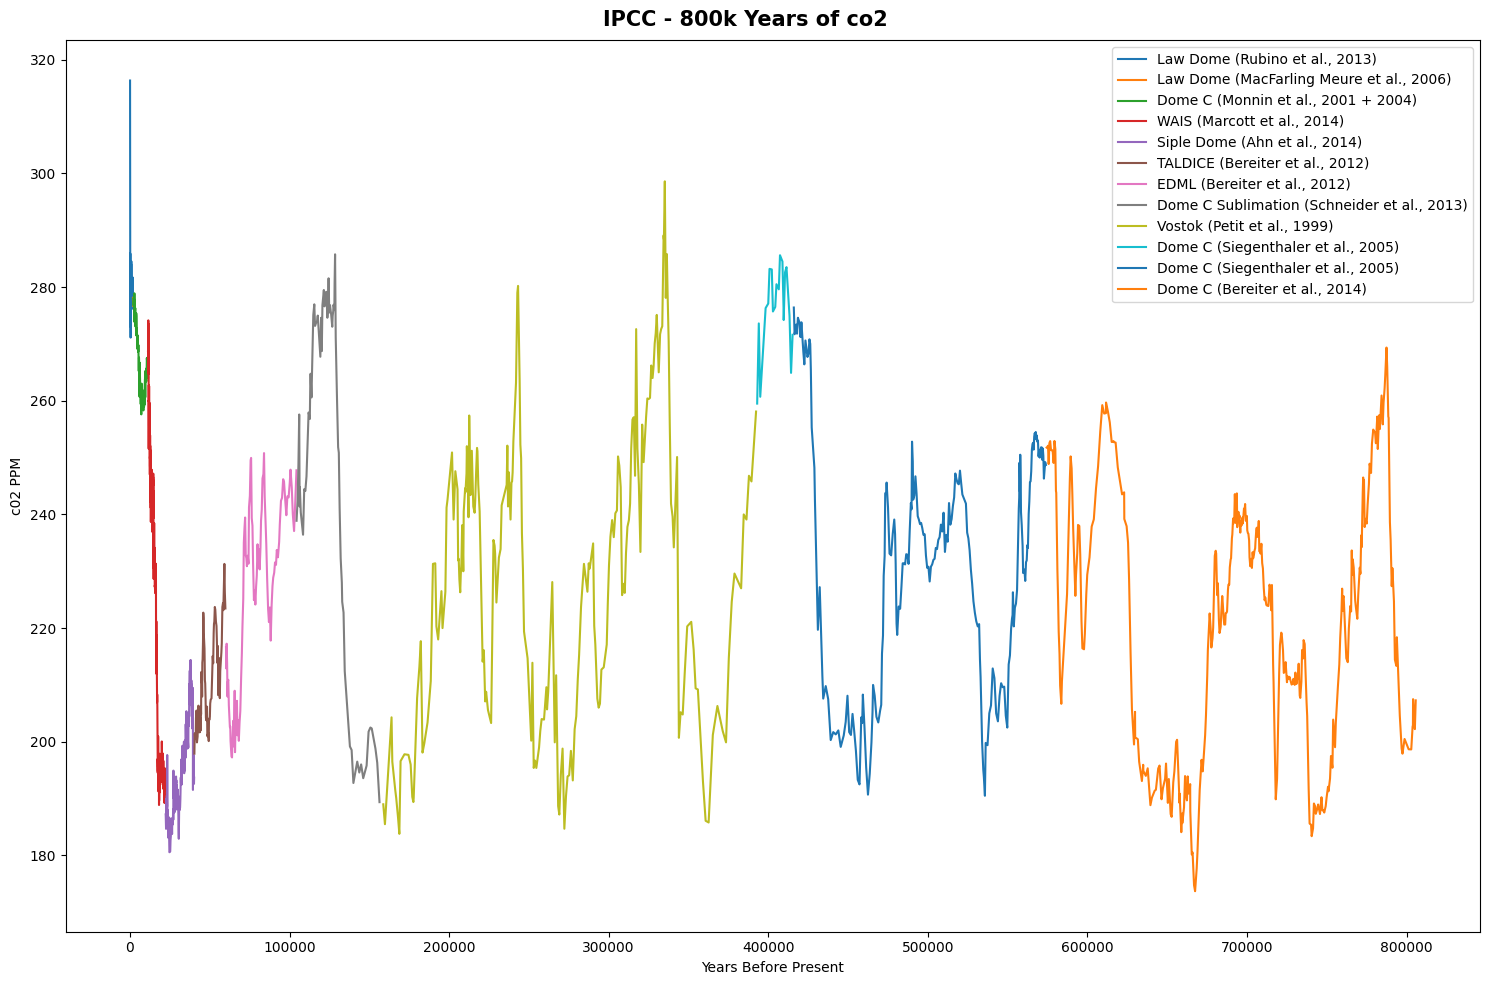

In [101]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

# plot the composite graph with labelling and titles
ax.plot(rubino['years_before_present'], rubino['co2_ppmv'], label='Law Dome (Rubino et al., 2013)')
ax.plot(macfarling['years_before_present'], macfarling['co2_ppmv'], label = 'Law Dome (MacFarling Meure et al., 2006)')
ax.plot(monnin['years_before_present'], monnin['co2_ppmv'], label = 'Dome C (Monnin et al., 2001 + 2004)')
ax.plot(marcott['years_before_present'], marcott['co2_ppmv'], label = 'WAIS (Marcott et al., 2014)')
ax.plot(ahn['years_before_present'], ahn['co2_ppmv'], label = 'Siple Dome (Ahn et al., 2014)')
ax.plot(bereiter['years_before_present'], bereiter['co2_ppmv'], label = 'TALDICE (Bereiter et al., 2012)')
ax.plot(bereiter_2['years_before_present'], bereiter_2['co2_ppmv'], label  = 'EDML (Bereiter et al., 2012)')
ax.plot(schneider['years_before_present'], schneider['co2_ppmv'], label = 'Dome C Sublimation (Schneider et al., 2013)')
ax.plot(petit['years_before_present'], petit['co2_ppmv'], label = 'Vostok (Petit et al., 1999)')
ax.plot(siegenthaler['years_before_present'], siegenthaler['co2_ppmv'], label = 'Dome C (Siegenthaler et al., 2005)')
ax.plot(siegenthaler_2['years_before_present'], siegenthaler_2['co2_ppmv'], label = 'Dome C (Siegenthaler et al., 2005)')
ax.plot(bereiter_3['years_before_present'], bereiter_3['co2_ppmv'], label = 'Dome C (Bereiter et al., 2014)')
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle("IPCC - 800k Years of co2", weight = 'bold', size = 15)
plt.tight_layout()

The composite of the Luthi et al subsets of data is plotted in the same way as the IPCC composite data. An immediate observation is that the data is not as well joined as the data in the IPCC. This is observed at the intersection between Dome C Siegenthaler and Dome C Luthi. The intersections of the subsets of data in the IPCC set are joined less crudely than Luthi. Another noticeable observation is that the large spike in carbon dioxide from the modern era is not observed in Luthi's dataset, most likely as the first data point is in 1813, before the widespread usage of fossil fuels.

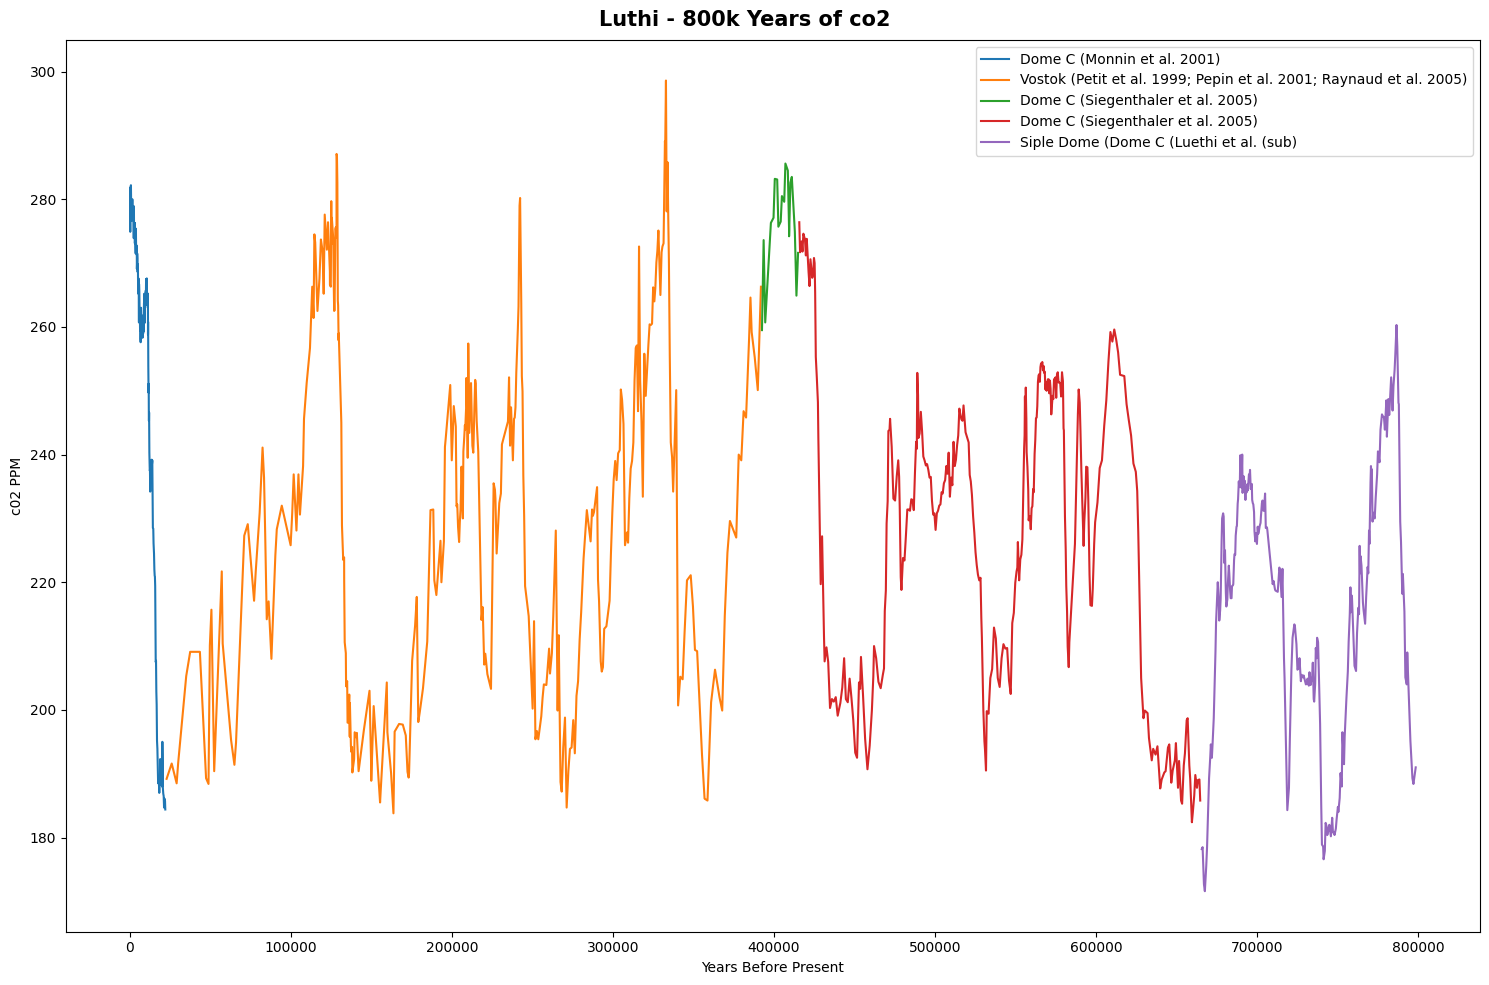

In [102]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

# plot the composite graph with labelling and titles
ax.plot(monnin_luthi['years_before_present'], monnin_luthi['co2_ppmv'], label='Dome C (Monnin et al. 2001)')
ax.plot(pettit_luthi['years_before_present'], pettit_luthi['co2_ppmv'], label = 'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005)')
ax.plot(siegenthaler_1_luthi['years_before_present'], siegenthaler_1_luthi['co2_ppmv'], label = 'Dome C (Siegenthaler et al. 2005)')
ax.plot(siegenthaler_2_luthi['years_before_present'], siegenthaler_2_luthi['co2_ppmv'], label = 'Dome C (Siegenthaler et al. 2005)')
ax.plot(luthi_luthi['years_before_present'], luthi_luthi['co2_ppmv'], label = 'Siple Dome (Dome C (Luethi et al. (sub)')
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle("Luthi - 800k Years of co2", weight = 'bold', size = 15)
plt.tight_layout()

Plotting both dataset over one another on the same axis allows for a direct comparison.

The most noticeable feature is that the two plots create a blurred appearance as if they are slightly out of phase with one another.

The IPCC data uses the The Antarctic Ice Core Chronology (AICC2012) (Veres et al, 2013) system to age carbon dioxide samples. The data in Luthi dataset uses the EDC3 chronology. The use of two different systems to data the same ice core samples would account for the discrepancy in datapoints that have the same co2 ppm concentration but are slightly out of synchronisation in terms of the time from present when the datapoints fall.

AICC2012 is said to present an improved timing for the last glacial inception and presents a slightly improved timing for the bipolar sequence of events over Marine Isotope Stage 3 (Bazin et al., 2013). Given the see saw nature of glacial-interglacial periods this suggests that the AICC2012 provides a better resolution on the age of samples.

Basin et al (op. cit.) found that the biggest deviation between AICC2012 and EDC occurs around Marine Isotope Stage 12 (MIS 12) approximately 478K years ago. This is not apparent on the plot below. It appears that there is a noticeably bigger deviation between 350,000 - 400,00 years ago.

Some parts of the respective plots cancel each other out (from approximately 600,000-700,00 years ago) suggesting very little disparity between the two chronological systems for samples that fall in that age range.

Apart from the period of approximately 20,00 years ago to 100,000 years ago the trends over time on the two datasets closely match one another.

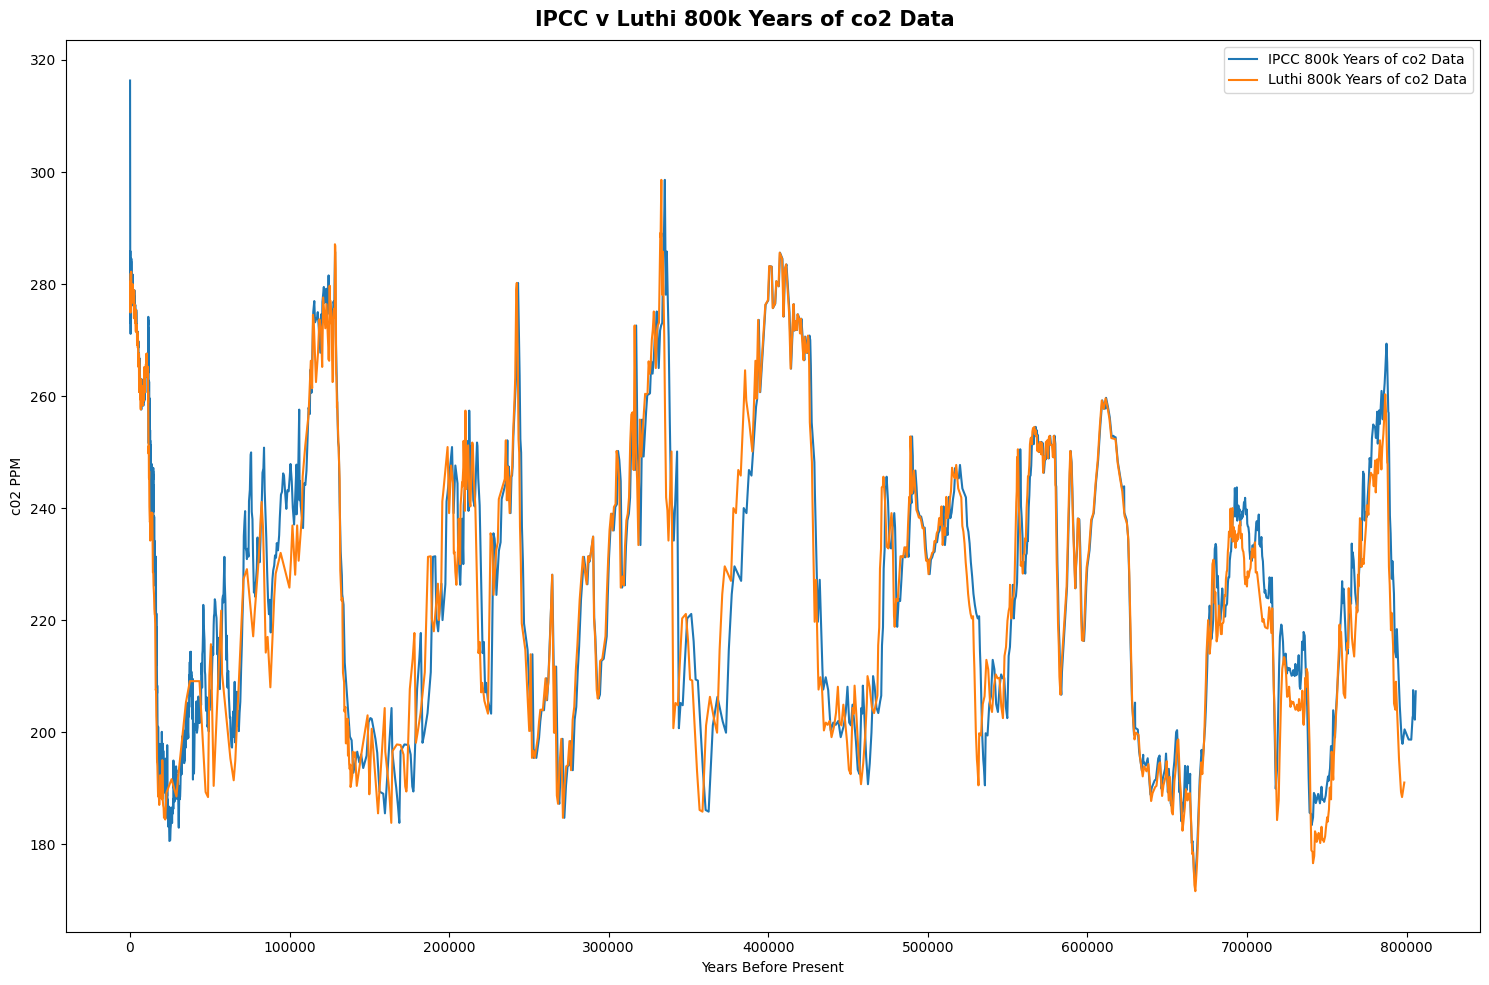

In [103]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(ipcc_full_co2_data['years_before_present'], ipcc_full_co2_data['co2_ppmv'], label = 'IPCC 800k Years of co2 Data')
ax.plot(luthi_full_co2_data['years_before_present'], luthi_full_co2_data['co2_ppmv'], label = 'Luthi 800k Years of co2 Data')
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle('IPCC v Luthi 800k Years of co2 Data', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

---

## Examine one other (paleo/modern) feature

---

## Irish context

---

## Fused Dataset

---

## Data Analysis

---

## Predictive Model

---

## References <a id="references"></a>

Bazin, L., Amaëlle Landais, Bénédicte Lemieux‐Dudon, Toye, H., Veres, D., Frédéric Parrenin, Martinerie, P., Ritz, C., Capron, É., Vladimir Ya. Lipenkov, Marie-France Loutre, Raynaud, D., Vinther, B.M., Svensson, A., Sune Olander Rasmussen, Severi, M., Blunier, T., Leuenberger, M., Fischer, H. and Valérie Masson‐Delmotte (2013). The Antarctic ice core chronology (AICC2012). doi:https://doi.org/10.1594/pangaea.824894.

Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

GeeksforGeeks. (2018). Python | Pandas DataFrame.astype(). [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/. [Accessed 15 Dec. 2023].

Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA, https://doi.org/10.1594/PANGAEA.683655

Lisiecki, L.E. and Raymo, M.E. (2005). A Pliocene-Pleistocene stack of 57 globally distributed benthic δ18O records. Paleoceanography, 20(1), p.n/a-n/a. doi:https://doi.org/10.1029/2004pa001071.

Lüthi, D., Le Floch, M., Bereiter, B., Blunier, T., Barnola, J.-M., Siegenthaler, U., Raynaud, D., Jouzel, J., Fischer, H., Kawamura, K. and Stocker, T.F. (2008). High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature, 453(7193), pp.379–382. doi:https://doi.org/10.1038/nature06949.

Marcott, S.A., Shakun, J.D., Clark, P.U. and Mix, A.C. (2013). A Reconstruction of Regional and Global Temperature for the Past 11,300 Years. Science, 339(6124), pp.1198–1201. doi:https://doi.org/10.1126/science.1228026.


Naveen (2022). How to Rename Columns With List in Pandas. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/rename-columns-with-list-in-pandas-dataframe/ [Accessed 13 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.concat — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.concat.html. [Accessed 13 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.drop — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html. [Accessed 13 Dec. 2023].

practicaldatascience.co.uk. (2022). How to reorder Pandas dataframe columns. [online] Available at: https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns. [Accessed 13 Dec. 2023].


saturncloud.io. (2023). How to Sort Pandas DataFrame by One or Multiple Column | Saturn Cloud Blog. [online] Available at: https://saturncloud.io/blog/
how-to-sort-pandas-dataframe-from-one-column/ [Accessed 13 Dec. 2023].

Shakun, J.D., Clark, P.U., He, F., Marcott, S.A., Mix, A.C., Liu, Z., Otto-Bliesner, B., Schmittner, A. and Bard, E. (2012). Global warming preceded by increasing carbon dioxide concentrations during the last deglaciation. Nature, [online] 484(7392), pp.49–54. doi:https://doi.org/10.1038/nature10915.

Snyder, C.W. (2016). Evolution of global temperature over the past two million years. Nature, [online] 538(7624), pp.226–228. doi:https://doi.org/10.1038/nature19798.

Stack Overflow. (n.d.). Reading tab-delimited file with Pandas - works on Windows, but not on Mac. [online] Available at: https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac [Accessed 15 Dec. 2023].

Veres, D., Bazin, L., Landais, A., Toyé Mahamadou Kele, H., Lemieux-Dudon, B., Parrenin, F., Martinerie, P., Blayo, E., Blunier, T., Capron, E., Chappellaz, J., Rasmussen, S.O., Severi, M., Svensson, A., Vinther, B. and Wolff, E.W. (2013). The Antarctic ice core chronology (AICC2012): an optimized multi-parameter and multi-site dating approach for the last 120 thousand years. Climate of the Past, 9(4), pp.1733–1748. doi:https://doi.org/10.5194/cp-9-1733-2013.

---

## Associated Reading <a id="associated-reading"></a>

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 13 Dec. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 13 Dec. 2023].

---

Notebook Ends